In [1]:
import numpy as np
import PyPDF2
import sys
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline 
import networkx as nx
from nltk.tokenize.punkt import PunktSentenceTokenizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

# Membaca dokumen

In [2]:
pdfFileObj = open('artikel.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
pageObj = pdfReader.getPage(0)
document = pageObj.extractText()
document

' Ketua Bidang Data dan Teknologi Informasi Satgas Penanganan Covid-19, Dewi Nur Aisyah, memintamasyarakat tidak menimbulkan kerumunan saat merayakan Tahun Baru 2021. Dia mengingatkan,kerumunan bisa memicu penularan Covid-19. "Jadi tahun baru ini berkumpul di luar dengan banyak orangsangat-sangat tidak kita anjurkan. Jangan ada lah kumpul-kumpul dulu walaupun di ruangan terbuka,"katanya saat mengisi Talk Show Covid-19 Dalam Angka di Gedung BNPB,  Selain tahun baru, dia jugamengajak umat Kristiani yang merayakan Natal tetap memperhatikan protokol kesehatan. "Harus dipikirkanapakah kapasitas ruangannya cukup, apakah bisa dikerjakan secara virtual, ini juga akan menjadipertimbangan," kata dia. Dewi juga mengingatkan risiko melakukan perjalanan saat masa libur panjang.Menurutnya, perjalanan di masa libur bisa memicu peningkatan kasus Covid-19 dan meningkatkanketerpakaian tempat tidur di rumah sakit rujukan Covid-19. Dia menyebut, masyarakat bisa tertular Covid-19saat berada di bandara, sta

In [3]:
artikel=open('artikel.txt','r')
document=artikel.read()
document

' Ketua Bidang Data dan Teknologi Informasi Satgas Penanganan Covid-19, Dewi Nur Aisyah, meminta masyarakat tidak menimbulkan kerumunan saat merayakan Tahun Baru 2021. Dia mengingatkan, kerumunan bisa memicu penularan Covid-19. "Jadi tahun baru ini berkumpul di luar dengan banyak orang sangat-sangat tidak kita anjurkan. Jangan ada lah kumpul-kumpul dulu walaupun di ruangan terbuka," katanya saat mengisi Talk Show Covid-19 Dalam Angka di Gedung BNPB,  Selain tahun baru, dia juga mengajak umat Kristiani yang merayakan Natal tetap memperhatikan protokol kesehatan. "Harus dipikirkan apakah kapasitas ruangannya cukup, apakah bisa dikerjakan secara virtual, ini juga akan menjadi pertimbangan," kata dia. Dewi juga mengingatkan risiko melakukan perjalanan saat masa libur panjang. Menurutnya, perjalanan di masa libur bisa memicu peningkatan kasus Covid-19 dan meningkatkan keterpakaian tempat tidur di rumah sakit rujukan Covid-19. Dia menyebut, masyarakat bisa tertular Covid-19 saat berada di ba

In [4]:
doc_tokenizer = PunktSentenceTokenizer()
sentences_list = doc_tokenizer.tokenize(document)

In [5]:
for i in sentences_list:
    print(i)
    print()

 Ketua Bidang Data dan Teknologi Informasi Satgas Penanganan Covid-19, Dewi Nur Aisyah, meminta masyarakat tidak menimbulkan kerumunan saat merayakan Tahun Baru 2021.

Dia mengingatkan, kerumunan bisa memicu penularan Covid-19.

"Jadi tahun baru ini berkumpul di luar dengan banyak orang sangat-sangat tidak kita anjurkan.

Jangan ada lah kumpul-kumpul dulu walaupun di ruangan terbuka," katanya saat mengisi Talk Show Covid-19 Dalam Angka di Gedung BNPB,  Selain tahun baru, dia juga mengajak umat Kristiani yang merayakan Natal tetap memperhatikan protokol kesehatan.

"Harus dipikirkan apakah kapasitas ruangannya cukup, apakah bisa dikerjakan secara virtual, ini juga akan menjadi pertimbangan," kata dia.

Dewi juga mengingatkan risiko melakukan perjalanan saat masa libur panjang.

Menurutnya, perjalanan di masa libur bisa memicu peningkatan kasus Covid-19 dan meningkatkan keterpakaian tempat tidur di rumah sakit rujukan Covid-19.

Dia menyebut, masyarakat bisa tertular Covid-19 saat berada

# Preproses Dokumen
## Preproses tanpa stemming

In [6]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

def preproses_tanpa_stem(text):
    #case folding
    text = text.lower()
    
    #cleansing
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text) #url
    text = re.sub(r"\d+", "", text) #numeric
    #text = re.sub("[A-Za-z]","", text)
    text = re.sub("@[A-Za-z0-9]+","", text) #mention
    text = re.sub("#[A-Za-z0-9]+","", text) #hastag
    text = text.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation))) #tanda baca
    text = text.strip() #white space
    text = text.replace('…','')
    
    #tokenize
    tokens = word_tokenize(text)
    
    #baku tak baku
    #dictionarynya jadikan external
    correct = {}
    file_slang = open("slangWords.txt", "r")
    sl = file_slang.readlines()
    for teks in range (len(sl)):
        teks=sl[teks].strip()
        teks=teks.split(':')
        correct[teks[0]]=teks[1]
    file_slang.close()
    
    baku=[]
    for x in tokens:
        if x in correct.keys():
            x=correct[x]
        baku.append(x)
    
    a=''
    for i in baku:
        a+=i+' '
    text=a
    
    #stopword
    #1 nltk
    tokens = word_tokenize(text)
    listStopword =  stopwords.words('indonesian')
    
    #addstop jadiin external
    addStop = []
    file_sw = open("addStopword.txt", "r")
    sw = file_sw.readlines()
    for teks in sw:
        addStop.append(teks.strip())
    file_sw.close()
    
    listStopword.extend(addStop)
    removed = []
    
    for t in tokens:
        if t not in listStopword:
            removed.append(t)
    
    a=''
    for i in removed:
        a+=i+' '
    text=a
    
    #2 sastrawi
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
 
    text = stopword.remove(text)
    
    return text

In [7]:
def addStopWord(word):
    file_sw = open("addStopword.txt", "a")
    file_sw.write('\n'+word)
    file_sw.close()

def addSlangWord(slang,baku):
    file_sw = open("slangWords.txt", "a")
    file_sw.write('\n'+slang+':'+baku)
    file_sw.close()

In [8]:
addStopWord('dewi')
addStopWord('nur')
addStopWord('aisyah')
addSlangWord('statsiun','stasiun')

In [9]:
cleared=[]
for i in sentences_list:
    temp=preproses_tanpa_stem(i)
    cleared.append(temp)
cleared

['ketua bidang data teknologi informasi satgas penanganan covid masyarakat menimbulkan kerumunan merayakan ',
 'kerumunan memicu penularan covid ',
 'berkumpul orang anjurkan ',
 'kumpul kumpul ruangan terbuka mengisi talk show covid angka gedung bnpb mengajak umat kristiani merayakan natal memperhatikan protokol kesehatan ',
 'dipikirkan kapasitas ruangannya virtual pertimbangan ',
 'risiko perjalanan libur ',
 'menurutnya perjalanan libur memicu peningkatan covid meningkatkan keterpakaian tidur rumah sakit rujukan covid ',
 'menyebut masyarakat tertular covid bandara stasiun bus stasiun kereta halte peristirahatan rest area perjalanan libur ',
 'lihat alur domino effect libur menyebabkan peningkatan kapasitas rumah sakit ']

## Preproses Dengan Stemming

In [10]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

def preproses(text):
    #case folding
    text = text.lower()
    
    #cleansing
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text) #url
    text = re.sub(r"\d+", "", text) #numeric
    #text = re.sub("[A-Za-z]","", text)
    text = re.sub("@[A-Za-z0-9]+","", text) #mention
    text = re.sub("#[A-Za-z0-9]+","", text) #hastag
    text = text.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation))) #tanda baca
    text = text.strip() #white space
    text = text.replace('…','')
    
    #tokenize
    tokens = word_tokenize(text)
    
    #baku tak baku
    #dictionarynya jadikan external
    correct = {}
    file_slang = open("slangWords.txt", "r")
    sl = file_slang.readlines()
    for teks in range (len(sl)):
        teks=sl[teks].strip()
        teks=teks.split(':')
        correct[teks[0]]=teks[1]
    file_slang.close()
    
    baku=[]
    for x in tokens:
        if x in correct.keys():
            x=correct[x]
        baku.append(x)
    
    a=''
    for i in baku:
        a+=i+' '
    text=a
    
    #stopword
    #1 nltk
    tokens = word_tokenize(text)
    listStopword =  stopwords.words('indonesian')
    
    #addstop jadiin external
    addStop = []
    file_sw = open("addStopword.txt", "r")
    sw = file_sw.readlines()
    for teks in sw:
        addStop.append(teks.strip())
    file_sw.close()
    
    listStopword.extend(addStop)
    removed = []
    
    for t in tokens:
        if t not in listStopword:
            removed.append(t)
    
    a=''
    for i in removed:
        a+=i+' '
    text=a
    
    #2 sastrawi
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
 
    text = stopword.remove(text)
    
    #stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = stemmer.stem(text)
    
    return text

In [11]:
cleared_stem=[]
for i in sentences_list:
    temp=preproses(i)
    cleared_stem.append(temp)
cleared_stem

['ketua bidang data teknologi informasi satgas tangan covid masyarakat timbul kerumun raya',
 'kerumun picu tular covid',
 'kumpul orang anjur',
 'kumpul kumpul ruang buka isi talk show covid angka gedung bnpb ajak umat kristiani raya natal perhati protokol sehat',
 'pikir kapasitas ruang virtual timbang',
 'risiko jalan libur',
 'turut jalan libur picu tingkat covid tingkat pakai tidur rumah sakit rujuk covid',
 'sebut masyarakat tular covid bandara stasiun bus stasiun kereta halte istirahat rest area jalan libur',
 'lihat alur domino effect libur sebab tingkat kapasitas rumah sakit']

# Fitur / Get Word

In [55]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(cleared)
a=cv_matrix.toarray()
a.shape

(9, 64)

In [56]:
print(cv.get_feature_names())
a=cv.get_feature_names()

['alur', 'angka', 'anjurkan', 'area', 'bandara', 'berkumpul', 'bidang', 'bnpb', 'bus', 'covid', 'data', 'dipikirkan', 'domino', 'effect', 'gedung', 'halte', 'informasi', 'kapasitas', 'kereta', 'kerumunan', 'kesehatan', 'keterpakaian', 'ketua', 'kristiani', 'kumpul', 'libur', 'lihat', 'masyarakat', 'memicu', 'memperhatikan', 'mengajak', 'mengisi', 'menimbulkan', 'meningkatkan', 'menurutnya', 'menyebabkan', 'menyebut', 'merayakan', 'natal', 'orang', 'penanganan', 'peningkatan', 'penularan', 'peristirahatan', 'perjalanan', 'pertimbangan', 'protokol', 'rest', 'risiko', 'ruangan', 'ruangannya', 'rujukan', 'rumah', 'sakit', 'satgas', 'show', 'stasiun', 'talk', 'teknologi', 'terbuka', 'tertular', 'tidur', 'umat', 'virtual']


# Matrik Tf idf

In [57]:
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
tfidf=normal_matrix.toarray()

In [58]:
import pandas as pd
dfb = pd.DataFrame(data=tfidf,index=["kalimat 1", "kalimat 2","kalimat 3","kalimat 4","kalimat 5","kalimat 6","dkalimat 7","kalimat 8","kalimat 9"],columns=[a])
dfb

,alur,angka,anjurkan,area,bandara,berkumpul,bidang,bnpb,bus,covid,...,satgas,show,stasiun,talk,teknologi,terbuka,tertular,tidur,umat,virtual
kalimat 1,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.30897,0.000000,0.000000,0.178889,...,0.30897,0.000000,0.000000,0.000000,0.30897,0.000000,0.000000,0.00000,0.000000,0.000000
kalimat 2,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.348383,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
kalimat 3,0.000000,0.000000,0.57735,0.000000,0.000000,0.57735,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
kalimat 4,0.000000,0.223336,0.00000,0.000000,0.000000,0.00000,0.00000,0.223336,0.000000,0.129308,...,0.00000,0.223336,0.000000,0.223336,0.00000,0.223336,0.000000,0.00000,0.223336,0.000000
kalimat 5,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.460611
kalimat 6,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000
dkalimat 7,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.363382,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.31381,0.000000,0.000000
kalimat 8,0.000000,0.000000,0.00000,0.258122,0.258122,0.00000,0.00000,0.000000,0.258122,0.149449,...,0.00000,0.000000,0.516244,0.000000,0.00000,0.000000,0.258122,0.00000,0.000000,0.000000
kalimat 9,0.347639,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000


In [59]:
print(tfidf)

[[0.         0.         0.         0.         0.         0.
  0.30896956 0.         0.         0.17888876 0.30896956 0.
  0.         0.         0.         0.         0.30896956 0.
  0.         0.26096061 0.         0.         0.30896956 0.
  0.         0.         0.         0.26096061 0.         0.
  0.         0.         0.30896956 0.         0.         0.
  0.         0.26096061 0.         0.         0.30896956 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.30896956 0.         0.         0.         0.30896956 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.34838339 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.50821716 0.         0.         0.         0.
  0.         0.         0.         0.         0.50821716 0.
  0.         0.         0.         0.         0.     

# matrik similaritas / adjacency

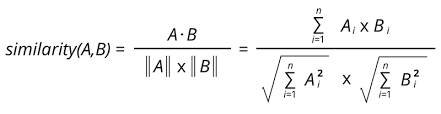

In [60]:
Image(filename='cosinus.png') 

In [61]:
vektorkalimat=normal_matrix.toarray()
A=vektorkalimat[0]
B=vektorkalimat[1]
dot = np.dot(A, B)
norma = np.linalg.norm(A)
normb = np.linalg.norm(B)
cos = dot / (norma * normb)

cos

0.19494653226076505

In [62]:
res_graph = normal_matrix * normal_matrix.T # similaritas /adjacency matrix
G=res_graph.toarray()

In [63]:
print(G)

[[1.         0.19494653 0.         0.07235748 0.         0.
  0.06500499 0.08362784 0.        ]
 [0.19494653 1.         0.         0.04504875 0.         0.
  0.26129855 0.05206552 0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.        ]
 [0.07235748 0.04504875 0.         1.         0.         0.
  0.04698822 0.01932494 0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.11423026]
 [0.         0.         0.         0.         0.         1.
  0.21523637 0.1770414  0.10453499]
 [0.06500499 0.26129855 0.         0.04698822 0.         0.21523637
  1.         0.13209345 0.2794013 ]
 [0.08362784 0.05206552 0.         0.01932494 0.         0.1770414
  0.13209345 1.         0.03777892]
 [0.         0.         0.         0.         0.11423026 0.10453499
  0.2794013  0.03777892 1.        ]]


In [64]:
import pandas as pd
dfb = pd.DataFrame(data=G)
dfb

,0,1,2,3,4,5,6,7,8
0,1.000000,0.194947,0.0,0.072357,0.00000,0.000000,0.065005,0.083628,0.000000
1,0.194947,1.000000,0.0,0.045049,0.00000,0.000000,0.261299,0.052066,0.000000
2,0.000000,0.000000,1.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,0.072357,0.045049,0.0,1.000000,0.00000,0.000000,0.046988,0.019325,0.000000
4,0.000000,0.000000,0.0,0.000000,1.00000,0.000000,0.000000,0.000000,0.114230
5,0.000000,0.000000,0.0,0.000000,0.00000,1.000000,0.215236,0.177041,0.104535
6,0.065005,0.261299,0.0,0.046988,0.00000,0.215236,1.000000,0.132093,0.279401
7,0.083628,0.052066,0.0,0.019325,0.00000,0.177041,0.132093,1.000000,0.037779
8,0.000000,0.000000,0.0,0.000000,0.11423,0.104535,0.279401,0.037779,1.000000


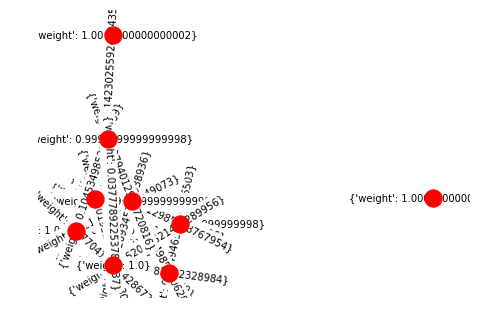

In [65]:
G = nx.from_numpy_matrix(np.matrix(G), create_using=nx.DiGraph())
layout = nx.spring_layout(G)
nx.draw(G, layout)
nx.draw_networkx_edge_labels(G, pos=layout)
plt.show()

Banyaknya sisi : 25
Banyaknya node : 9


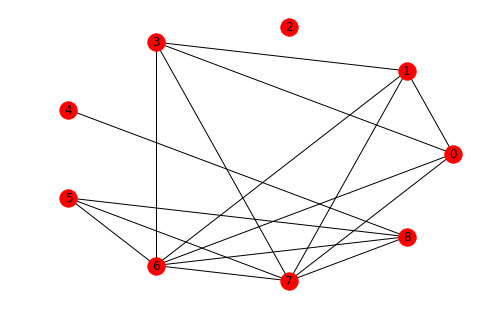

In [66]:
#nx_graph = nx.from_scipy_sparse_matrix(res_graph, parallel_edges=True, create_using=nx.MultiGraph)
#nx_graph=nx.from_scipy_sparse_matrix(res_graph, create_using=nx.DiGraph())
nx_graph=nx.from_scipy_sparse_matrix(res_graph)

#nx_graph = nx.from_numpy_matrix(res_graph, create_using=nx.DiGraph)
nx.draw_circular(nx_graph,with_labels=True)
print('Banyaknya sisi : {}'.format(nx_graph.number_of_edges()))
print('Banyaknya node : {}'.format(nx_graph.number_of_nodes()))
plt.show()

# PageRank

In [67]:
pageranks = nx.pagerank(nx_graph)

In [68]:
for i in pageranks:
    print(i+1,')', pageranks[i])

1 ) 0.10719662453329304
2 ) 0.11256640758368491
3 ) 0.1111111111111111
4 ) 0.0994965460135802
5 ) 0.1004762328862386
6 ) 0.10834821395059363
7 ) 0.13783565700137304
8 ) 0.1097390374236152
9 ) 0.11323016949651024


In [69]:
sentence_array = sorted(((pageranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)
print(sentence_array)

[['0.13783565700137304'
  'Menurutnya, perjalanan di masa libur bisa memicu peningkatan kasus Covid-19 dan meningkatkan keterpakaian tempat tidur di rumah sakit rujukan Covid-19.']
 ['0.11323016949651024'
  '"Kalau kita lihat alur domino effect, libur panjang menyebabkan peningkatan kasus, kapasitas rumah sakit," tandasnya.']
 ['0.11256640758368491'
  'Dia mengingatkan, kerumunan bisa memicu penularan Covid-19.']
 ['0.1111111111111111'
  '"Jadi tahun baru ini berkumpul di luar dengan banyak orang sangat-sangat tidak kita anjurkan.']
 ['0.1097390374236152'
  'Dia menyebut, masyarakat bisa tertular Covid-19 saat berada di bandara, stasiun bus, statsiun kereta, halte peristirahatan dan rest area ketika melakukan perjalanan selama masa libur.']
 ['0.10834821395059363'
  'Dewi juga mengingatkan risiko melakukan perjalanan saat masa libur panjang.']
 ['0.10719662453329304'
  ' Ketua Bidang Data dan Teknologi Informasi Satgas Penanganan Covid-19, Dewi Nur Aisyah, meminta masyarakat tidak meni

In [70]:
rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

In [71]:
print('maximum pagerank :',rank_max)
print('minimum pagerank :',rank_min)

maximum pagerank : 0.13783565700137304
minimum pagerank : 0.0994965460135802


In [72]:
temp_array = [] #skor normalisasi

# Jika semua rank sama
# taking any sentence will give the summary, say the first sentence
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

# If the sentence has different ranks
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

print(len(temp_array))
print(temp_array)
print(sentence_array[4,0])

9
[1.0, 0.3582144480946056, 0.34090152936165247, 0.30294299471964753, 0.2671551620822977, 0.23087827831562918, 0.2008413424652581, 0.025553197437737388, 0.0]
0.1097390374236152


In [73]:
# Calculation of threshold:
# We take the mean value of normalized scores
threshold = (sum(temp_array) / len(temp_array))

In [74]:
# Separate out the sentences that satiasfy the criteria of having a score above the threshold
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

In [75]:
summary = " ".join(str(x) for x in sentence_list)
print(summary)

Menurutnya, perjalanan di masa libur bisa memicu peningkatan kasus Covid-19 dan meningkatkan keterpakaian tempat tidur di rumah sakit rujukan Covid-19. "Kalau kita lihat alur domino effect, libur panjang menyebabkan peningkatan kasus, kapasitas rumah sakit," tandasnya. Dia mengingatkan, kerumunan bisa memicu penularan Covid-19.


In [76]:
f = open('summary.txt', 'w')
f.write(summary)
f.close()